In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [8]:
cities

['ushuaia',
 'yellowknife',
 'muisne',
 'puerto ayora',
 'bengkulu',
 'rikitea',
 'anqing',
 'cabo san lucas',
 'frunze',
 'hithadhoo',
 'cidreira',
 'punta arenas',
 'dunedin',
 'barrow',
 'puri',
 'talcahuano',
 'atuona',
 'jabinyanah',
 'nanortalik',
 'talnakh',
 'tupancireta',
 'pemangkat',
 'sorland',
 'solhan',
 'longyearbyen',
 'port alfred',
 'mataura',
 'akonolinga',
 'fortuna',
 'upernavik',
 'hermanus',
 'kandla',
 'saint-philippe',
 'malwan',
 'bathsheba',
 'provideniya',
 'hobart',
 'beira',
 'dubai',
 'arak',
 'ribeira grande',
 'nuuk',
 'alice',
 'waipawa',
 'kaitangata',
 'hamilton',
 'bredasdorp',
 'cape town',
 'hay river',
 'sioux lookout',
 'gushikawa',
 'kamenka',
 'sao joao da barra',
 'nouadhibou',
 'guerrero negro',
 'toliary',
 'vila franca do campo',
 'korla',
 'faya',
 'jacareacanga',
 'bluff',
 'olafsvik',
 'mahebourg',
 'ambon',
 'albany',
 'port elizabeth',
 'grand gaube',
 'vao',
 'nova gradiska',
 'qui nhon',
 'torbay',
 'masvingo',
 'butaritari',
 'tiks

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71e5082318a0cb6f1877908fbd45d943


In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 45.79,
  'feels_like': 39.47,
  'temp_min': 44.01,
  'temp_max': 48,
  'pressure': 1019,
  'humidity': 87},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 130},
 'rain': {'1h': 0.87},
 'clouds': {'all': 90},
 'dt': 1603895076,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1603883585,
  'sunset': 1603921361},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# Get the JSON data.
boston_data = city_weather.json()

In [15]:
boston_data['sys']["country"]

'US'

In [16]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 48 87 90 8.05


In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | muisne
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | bengkulu
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | anqing
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | frunze
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | cidreira
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | dunedin
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | puri
Processing Record 16 of Set 1 | talcahuano
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | jabinyanah
Processing Record 19 of Set 1 | nanortalik
Processing Record 20 of Set 1 | talnakh
Processing Record 21 of Set 1 | tupancireta
Processing Record 22 of Set 1 | pemangkat
Processing Record 23 of Set 1 | sorla

Processing Record 40 of Set 4 | broken hill
Processing Record 41 of Set 4 | tokur
Processing Record 42 of Set 4 | esperance
Processing Record 43 of Set 4 | keetmanshoop
Processing Record 44 of Set 4 | narsaq
Processing Record 45 of Set 4 | chapais
Processing Record 46 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 47 of Set 4 | sikasso
Processing Record 48 of Set 4 | odienne
Processing Record 49 of Set 4 | evensk
Processing Record 50 of Set 4 | baker city
Processing Record 1 of Set 5 | pisco
Processing Record 2 of Set 5 | otjiwarongo
Processing Record 3 of Set 5 | isangel
Processing Record 4 of Set 5 | tabas
Processing Record 5 of Set 5 | sola
Processing Record 6 of Set 5 | fort nelson
Processing Record 7 of Set 5 | san luis
Processing Record 8 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 5 | srandakan
Processing Record 10 of Set 5 | chicama
Processing Record 11 of Set 5 | poum
Processing Record 12 of Set 5 | comodoro rivadavia
Processi

City not found. Skipping...
Processing Record 31 of Set 8 | hauterive
Processing Record 32 of Set 8 | senanga
Processing Record 33 of Set 8 | taoudenni
Processing Record 34 of Set 8 | ponta delgada
Processing Record 35 of Set 8 | paamiut
Processing Record 36 of Set 8 | portobelo
Processing Record 37 of Set 8 | benguela
Processing Record 38 of Set 8 | bafoulabe
Processing Record 39 of Set 8 | sao miguel do araguaia
Processing Record 40 of Set 8 | buraydah
Processing Record 41 of Set 8 | mixtepec
City not found. Skipping...
Processing Record 42 of Set 8 | sawtell
Processing Record 43 of Set 8 | winnemucca
Processing Record 44 of Set 8 | dutlwe
Processing Record 45 of Set 8 | rio gallegos
Processing Record 46 of Set 8 | stokmarknes
Processing Record 47 of Set 8 | lorengau
Processing Record 48 of Set 8 | naze
Processing Record 49 of Set 8 | wenling
Processing Record 50 of Set 8 | goderich
Processing Record 1 of Set 9 | chama
Processing Record 2 of Set 9 | sakti
Processing Record 3 of Set 9

Processing Record 17 of Set 12 | marsa matruh
Processing Record 18 of Set 12 | jiayuguan
Processing Record 19 of Set 12 | port blair
Processing Record 20 of Set 12 | praia da vitoria
Processing Record 21 of Set 12 | ornskoldsvik
Processing Record 22 of Set 12 | terrace
Processing Record 23 of Set 12 | rajapalaiyam
Processing Record 24 of Set 12 | kostomuksha
Processing Record 25 of Set 12 | franklin
Processing Record 26 of Set 12 | belmonte
Processing Record 27 of Set 12 | amga
Processing Record 28 of Set 12 | falam
Processing Record 29 of Set 12 | kenai
Processing Record 30 of Set 12 | haines junction
Processing Record 31 of Set 12 | akureyri
Processing Record 32 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 33 of Set 12 | srednekolymsk
Processing Record 34 of Set 12 | valle de allende
Processing Record 35 of Set 12 | ancud
Processing Record 36 of Set 12 | ouahigouya
Processing Record 37 of Set 12 | mezen
Processing Record 38 of Set 12 | floro
Processing Reco

In [26]:
len(city_data)

563

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,37.40,93,40,11.41,AR,2020-10-28 15:19:55
1,Yellowknife,62.46,-114.35,19.40,92,90,3.36,CA,2020-10-28 15:16:43
2,Muisne,0.60,-80.03,78.10,79,87,12.06,EC,2020-10-28 15:19:55
3,Puerto Ayora,-0.74,-90.35,70.00,88,75,2.24,EC,2020-10-28 15:19:56
4,Bengkulu,-3.80,102.27,76.57,86,100,3.56,ID,2020-10-28 15:19:56
5,Rikitea,-23.12,-134.97,74.48,83,99,14.41,PF,2020-10-28 15:19:56
6,Anqing,30.51,117.05,63.03,76,97,9.37,CN,2020-10-28 15:19:56
7,Cabo San Lucas,22.89,-109.91,73.99,58,0,11.01,MX,2020-10-28 15:19:56
8,Frunze,48.67,38.75,52.48,68,100,14.92,UA,2020-10-28 15:19:56
9,Hithadhoo,-0.60,73.08,83.79,72,26,12.57,MV,2020-10-28 15:17:57


In [28]:
new_columns= ["City","Country","Date","Lat","Lng","Max Temp","Humidity", "Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_columns]

In [30]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2020-10-28 15:19:55,-54.80,-68.30,37.40,93,40,11.41
1,Yellowknife,CA,2020-10-28 15:16:43,62.46,-114.35,19.40,92,90,3.36
2,Muisne,EC,2020-10-28 15:19:55,0.60,-80.03,78.10,79,87,12.06
3,Puerto Ayora,EC,2020-10-28 15:19:56,-0.74,-90.35,70.00,88,75,2.24
4,Bengkulu,ID,2020-10-28 15:19:56,-3.80,102.27,76.57,86,100,3.56
5,Rikitea,PF,2020-10-28 15:19:56,-23.12,-134.97,74.48,83,99,14.41
6,Anqing,CN,2020-10-28 15:19:56,30.51,117.05,63.03,76,97,9.37
7,Cabo San Lucas,MX,2020-10-28 15:19:56,22.89,-109.91,73.99,58,0,11.01
8,Frunze,UA,2020-10-28 15:19:56,48.67,38.75,52.48,68,100,14.92
9,Hithadhoo,MV,2020-10-28 15:17:57,-0.60,73.08,83.79,72,26,12.57


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

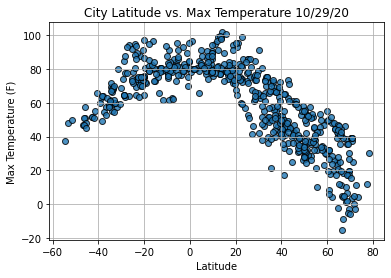

In [34]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

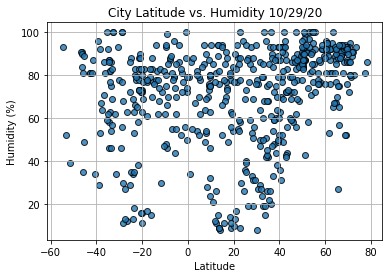

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

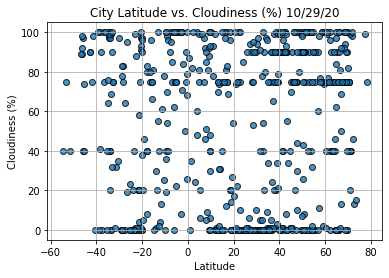

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

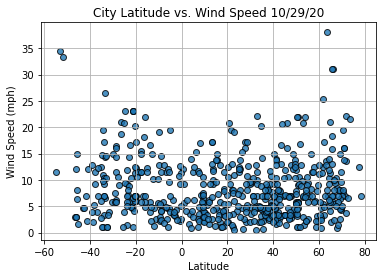

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()